# Curve Fitting and Model Evaluation

## 1 Preparation

Import the modules required for this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.optimize import curve_fit
from scipy import stats

Define the Functions required for this notebook

In [2]:
class utils:
    @staticmethod
    def exponential(x, a, b, c):
        return a * np.exp(b * x) + c

    @staticmethod
    def linear(x, a, b):
        return a + x * b

    @staticmethod
    def polynomial(x, a, b, c, d):
        return a + b * x + c * x**2 + d * x**3

    @staticmethod
    def logistic(x, K, r, x0):
        return K / (1 + np.exp(-r * (x - x0)))

    @staticmethod
    def damped_sine(x, a, f, phi, gamma):
        return a * np.exp(-gamma * x) * np.sin(f * x + phi)

    @staticmethod
    def generate_data1():
        x = np.linspace(3, 6, 1000)
        y_true = utils.exponential(x, a=0.1, b=1.4, c=1.0)
        noise_level = 0.2 * np.max(y_true)
        noise = np.random.normal(0, noise_level, len(x))
        y = utils.exponential(x, 1, 1.2, 1)
        y += noise
        return x, y

    @staticmethod
    def generate_data2():
        x = np.linspace(0, 10, 1000)
        y = utils.linear(x, -1, 0.4)
        noise_level = 0.3 * np.max(y)
        noise = np.random.normal(0, noise_level, len(x))
        y += noise
        return x, y

    @staticmethod
    def generate_data3():
        np.random.seed(42)
        x = np.linspace(0, 10, 100)
        y = utils.logistic(x, 10, 1, 5) + 0.5 * np.random.randn(len(x))
        return x, y

    @staticmethod
    def generate_data4():
        # Generate synthetic data
        np.random.seed(42)
        x = np.linspace(0, 3, 60)  # Shorter window, harder to estimate frequency
        true_params = [2.0, 12.0, 0.5, 0.4]  # Higher frequency, more damping
        y_true = utils.damped_sine(x, *true_params)
        y = y_true + 0.6 * np.random.randn(len(x))  # More noise
        return x, y

    @staticmethod
    def confidence_intervals(n_data, params, pcov, ci=0.95):
        alpha = 1 - ci
        dof = n_data - len(params)
        t_val = stats.t.ppf(1 - alpha / 2, dof)
        param_errors = np.sqrt(np.diag(pcov))
        ci_lower = params - t_val * param_errors
        ci_upper = params + t_val * param_errors
        return ci_lower, ci_upper

## 2 Fitting Curves to Data

In research, we often want to describe the relationship between two
variables, such as the intensity of a stimulus and the magnitude of the
neural response by using a model. This could be a simple linear model
which predicts a steady increase in the dependent variable (e.g. the
neural response) for every unit increase in the independent variable
(e.g. the stimulus magnitude). We could also use a more sophisticated
model that captures a specific relationship that we expect to be present
in our data. However, regardless of the exact model we choose, the
process of fitting the model remains the same. We can use a function
from the `scipy.optimize` module called `curve_fit` which takes in a
function of the model as well as the data the model is being fit to.
Then, `curve_fit` will run many iteration of the model with different
parameters and find the set of parameters that best fit the data. The
best fit is defined as the model that minimizes the sum of squared
residuals which is the part of the data that can not be accounted for by
the model (more on this in the next section). After converging on the
best fitting model, `curve_fit` returns the optimal parameters and the
parameter covariance matrix (more on the covariance matrix in
<a href="#sec-cov" class="quarto-xref">Section 4</a>). We can then use
these parameters to predict the values of the dependent variable and
plot these model estimates together with the original data to see how
well the model fits the underlying trend. In this section, we are going
to learn how to apply `curve_fit` by fitting multiple functions to
simulated data and visualize the resulting models.

| Code | Description |
|------------------------------------|------------------------------------|
| `x, y = utils.generate_data1()` | Randomly generate synthetic data points `x` and `y` |
| `x, y = utils.generate_data2()` | Randomly generate different synthetic data points `x` and `y` |
| `y = utils.linear(x, a, b)` | Return the `y` values for the input `x` values using a `linear` model with parameters `a` and `b` |
| `y = utils.exponential(x, a, b, c)` | Return the `y` values for the input `x` values using an `exponential` model with parameters `a`, `b` and `c` |
| `y = utils.polynomial(x, a, b, c, d)` | Return the `y` values for the input `x` values using a `polynomial` model with parameters `a`, `b`, `c` and `d` |
| `popt, pcov = curve_fit(fun, x, y)` | Fit the function `fun` to the data `x`, `y` and return the optimal parameters `popt` and the parameter covariance `pcov` |
| `y = utils.polynomial(x, *popt)` | Return the `y` values for the input `x` values using a `polynomial` model with the optimal parameter `*popt` |
| `np.linspace(start, stop, n_steps)` | Create a linearly spaced vector that goes from `start` to `stop` in `n_steps` |
| `plt.scatter(x, y, s=5)` | Plot the data `x`, `y` in a scatter plot with marker size `s=5` |
| `plt.plot(x, y, linestyle="--", color="black")` | Plot the data `x`, `y` as a `"black"` dashed line |

------------------------------------------------------------------------

<span class="theorem-title">**Example 1**</span> Generate data and
visualize it using a `scatter` plot.

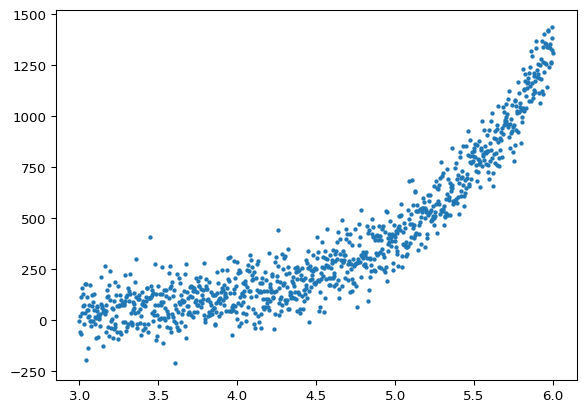

In [3]:
x, y = utils.generate_data1()
plt.scatter(x, y, s=5)

<span class="theorem-title">**Example 2**</span> Use `curve_fit` fit the
`utils.linear` function to the points `x`, `y` and return the optimized
parameters `popt` and their covaraince `pcov`.

In [4]:
popt, pcov = curve_fit(utils.linear, x, y)

<span class="theorem-title">**Example 3**</span> Use the `utils.linear`
function with the optimized parameters `popt` to generate the values
`y_fit` and plot them together with the original data points.

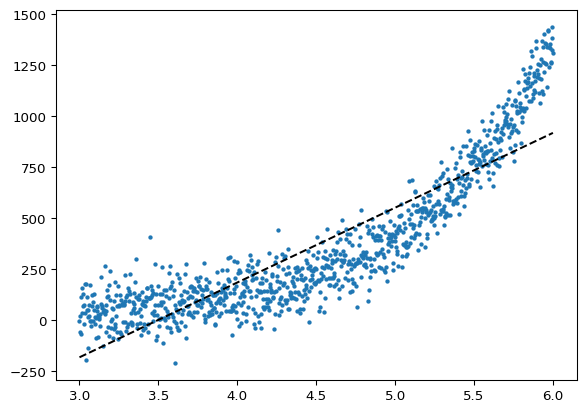

In [5]:
y_fit = utils.linear(x, *popt)
plt.scatter(x, y, s=5)
plt.plot(x, y_fit, linestyle="--", color="black")

<span class="theorem-title">**Exercise 1**</span> Fit the data points
`x`, `y` using the `utils.exponential` function and return the optimized
parameters `popt` and their covariance `pcov`.

​

<span class="theorem-title">**Exercise 2**</span> Use the
`utils.exponential` function with optimized parameters `popt` to
generate the values `y_fit` and plot them together with the original
data points (HINT: the exponential function takes 3 parameters).

​

<span class="theorem-title">**Example 4**</span> Create a new vector of
x coordinates `x_ext` with `100` points between `2` and `7` and
extrapolate the model to points outside of the range of the original
data.

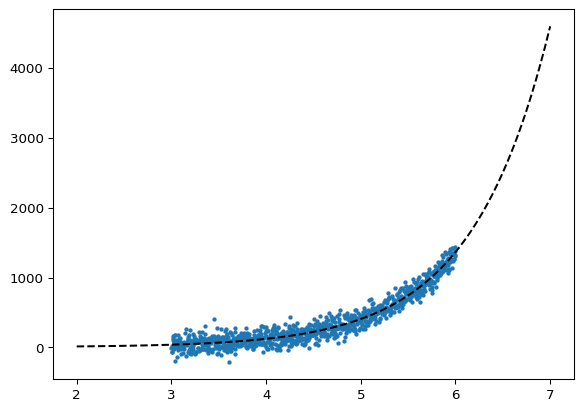

In [10]:
x_ext = np.linspace(2, 7, 100)
y_fit = utils.exponential(x_ext, *popt)
plt.scatter(x, y, s=5)
plt.plot(x_ext, y_fit, linestyle="--", color="black")

<span class="theorem-title">**Exercise 3**</span> Fit the data points
`x`, `y` using the `utils.polynomial` function and return the optimized
parameters `popt` and their covariance `pcov`.

​

<span class="theorem-title">**Exercise 4**</span> Use the
`utils.polynomial` function with optimized parameters `popt` to generate
the values `y_fit` and plot them together with the original data points
(HINT: instead of passing the elements of `popt` individually, you can
pass them as a list `*popt`).

​

<span class="theorem-title">**Exercise 5**</span> Create a new vector of
x coordinates `x_ext` with `100` points between `2` and `7` and
extrapolate the model to points outside of the range of the original
data.

​

<span class="theorem-title">**Exercise 6**</span> Use the function
`utils.generate_data2()` to generate a new set of `x` and `y` data
points and plot them with `plt.scatter`. Which function would you choose
to fit to this data?

​

<span class="theorem-title">**Exercise 7**</span> Use `curve_fit` with
the function that is the best fit for the data from the previous
exercise and plot the data together with the fitted function. If you are
unsure which function to choose, try different ones.

​

## 3 Computing and Visualizing Model Residuals

Even if a model fits our data well, it won’t account for all of the
variance if some of the variance is due to random noise. The parts of
the data that are not explained by the model are called the residuals
and they are computed by simply subtracting the model’s prediction from
the actual data. The residuals and their distribution carry important
diagnostic information about the model fit. If the model correctly
captures the underlying trend in the data, the residuals should be
normaly distributed around 0 (i.e. they should reflect the random noise
in the data). Residuals that deviate from the normal distribution
indicate that our model may be misspecified leading to systematically
wrong predictions. We can also use the residuals to compute the
coefficient of determination $R^2$ which 1 minus the sum of squared
residuals divided by the total sum of squares in the data:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

If the model predicts the data perfectly, the residuals and their sum of
squares will be 0, leading to an $R^2$ value of 1. Values below 1
indicate that the model is not capturing some of the variance in our
data. For example, an $R^2$ value of 0.8 means that the model accounts
for 80% of the variance in the data. In this section, you will learn how
to compute the residuals and the coefficient of determination and how to
visualize the distribution of residuals.

| Code | Description |
|------------------------------------|------------------------------------|
| `residuals = y - y_fit` | Compute the model `residuals` as the difference between the data `y` and the model’s predicton `y_fit` |
| `ss_res = np.sum((y - y_fit) ** 2)` | Compute the sum of the squared residuals |
| `ss_tot = np.sum((y - np.mean(y_fit)) ** 2)` | Compute the total sum of squares of the data `y` |
| `r_squared = 1 - (ss_res / ss_tot)` | Compute the coefficient of determination `r_squared` |
| `ax = plt.subplot()` | Create a new subplot and assign the returned object to the variable `ax` |
| `stats.probplot(residuals, dist="norm", plot=ax)` | Plot the quantiles of the distribution of `residuals` against a theoretical normal distribution on the graph `ax` |
| `plt.axhline(y=0, color="black", linestyle="--")` | Draw a horizontal `"black"` dashed line at `y=0` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 5**</span> Get the model
`residuals` by taking the difference between the original data points
`y` and the ponts predicted by the fitted model `y_fit`. Then, create a
scatter plot of the `residuals` against the data points `x` and add a
horizontal line at `y=0` for reference.

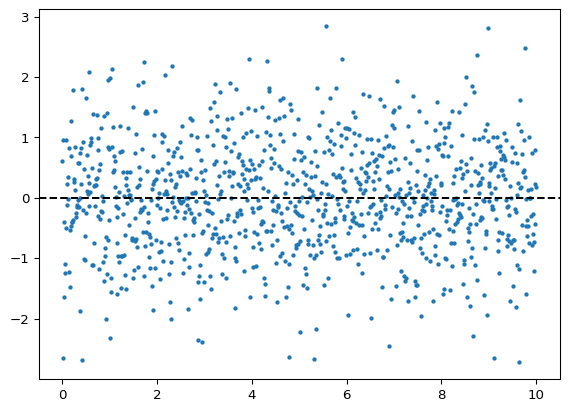

In [21]:
residuals = y - y_fit
plt.scatter(x, residuals, s=5)
plt.axhline(y=0, color="black", linestyle="--")

<span class="theorem-title">**Example 6**</span> Create a
quantile-quantile or Q-Q plot that compares the distribution of the
`residuals` agains a normal distribution. If the model fits the data
well, the points should scatter around the red line.

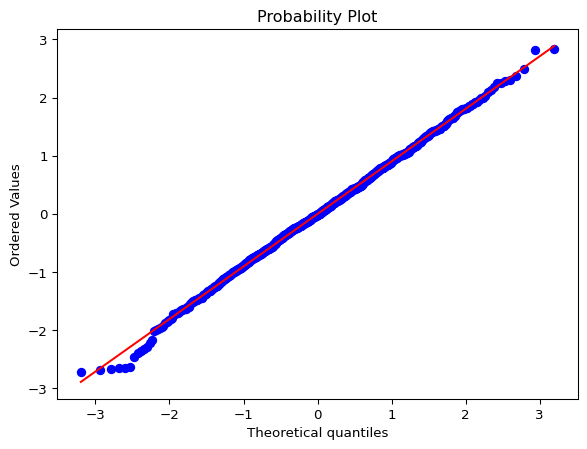

In [22]:
ax = plt.subplot()
stats.probplot(residuals, dist="norm", plot=ax);

Run the cell below to generate a new set of data points `x` and `y`, fit
a linear model to them and plot the data points together with the model
fit.

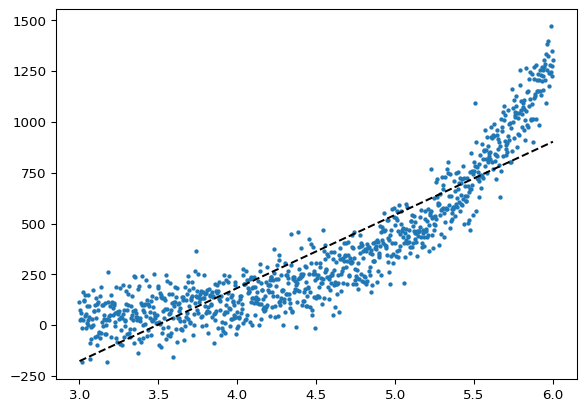

In [23]:
x, y = utils.generate_data1()
popt, pcov = curve_fit(utils.linear, x, y)
y_fit = utils.linear(x, *popt)
plt.scatter(x, y, s=5)
plt.plot(x, utils.linear(x, *popt), color="black", linestyle="--")

<span class="theorem-title">**Exercise 8**</span> Compute the model
`residuals` and create a scatter plot of the `residuals` against the
data points `x` and add a horizontal line at `y=0` for reference.

​

<span class="theorem-title">**Exercise 9**</span> Create a
quantile-quantile or Q-Q plot that compares the distribution of the
`residuals` agains a normal distribution. What does this plot tell you
about how well the data fits the model?

​

Run the cell below to fit an exponential model to the same data.

In [28]:
popt, pcov = curve_fit(utils.exponential, x, y)
y_fit = utils.exponential(x, *popt)

<span class="theorem-title">**Exercise 10**</span> Compute the residuals
and plot them in a scatter plot against the original `x` values and also
in a Q-Q plot agains a theoretical normal distribution. Is this model a
good fit for the data?

​

Run the cell below to fit a polynomial model to the same data.

In [31]:
popt, pcov = curve_fit(utils.polynomial, x, y)
y_fit = utils.polynomial(x, *popt)

<span class="theorem-title">**Exercise 11**</span> Compute the residuals
and plot them in a scatter plot against the original `x` values and also
in a Q-Q plot against a theoretical normal distribution. How does the
polynomial fit compare to the exponential

​

<span class="theorem-title">**Exercise 12**</span> Compute the
difference between the residuals of the exponential model in
<a href="#exr-resexp" class="quarto-xref">Exercise 10</a> and the
residuals from the polynomial model in
<a href="#exr-respol" class="quarto-xref">Exercise 11</a> and use
`plt.plot` to plot the difference of residuals against the data points
`x`.

​

<span class="theorem-title">**Example 7**</span> Fit a linear model to
the points `x`, `y` and compute the coefficient of determination
`r_squared`.

In [36]:
popt, pcov = curve_fit(utils.linear, x, y)
y_fit = utils.linear(x, *popt)

ss_res = np.sum((y - y_fit) ** 2)
ss_tot = np.sum((y - np.mean(y_fit)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.7890140795319505

<span class="theorem-title">**Exercise 13**</span> Fit an exponential
model to the points `x`, `y` and compute the coefficient of
determination `r_squared`. What proportion of the data’s variance does
this model account for?

​

<span class="theorem-title">**Exercise 14**</span> Fit a polynomial
model to the points `x`, `y` and compute the coefficient of
determination `r_squared`. According to `r_squared`, does this model
predict the data better or worse than the exponential model?

​

## 4 Quantifying Model Error and Uncertainty

So far, we only used the optimal set of parameters `popt` estimated by
`curve_fit`. However, the parameter covariance matrix `pcov` contains
important information as well. The diagonal of this matrix contains the
variance of each parameter which tells us about the uncertainty of each
individual parameter and the square root of the variance gives us the
standard error of the parameters. We can divide the error by the
absolute parameter value to get an estimate of each parameter’s
uncertainty in percent. We can also compare the error to a
T-distribution to compute a confidence interval for our model that tells
us the probability that the true model falls within a given range. The
confidence interval is usually visualized as a shaded area along with
the actual model. In this section, we are going to learn how to compute
the parameter errors from the covariance matrix `pcov` and how to
compute and visualize their confidence intervals.

| Code | Description |
|------------------------------------|------------------------------------|
| `popt, pcov = curve_fit(utils.exponential, x, y)` | Fit an exponential model to the data `x`, `y` and return the optimal parameters `popt` and their covariance matrix `pcov` |
| `param_errors = np.sqrt(np.diag(pcov))` | Compute the parameter errors as the square root of the diagonal of the covariance matrix `pcov` |
| `ci_low, ci_high = utils.confidence_intervals(n, popt, pcov, ci=0.95)` | Compute the 95% percent confidence interval for the model parameters `popt` with the covariance matrix `pcov` given `n` data points |
| `plt.fill_between(x, y1, y2, color="gray", alpha=0.5)` | Plot the data `x` against `y1` and `y2` and fill the area between the curves in `"grey"` with an opacity of `0.5` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 8**</span> Fit an exponential
model to the data `x`, `y` and compute the parameter error as the square
root of the diagonal of the matrix of parameter covariances `pcov`.
Divide the `param_errors` by the absolute values of `popt` and multiply
by `100` to get the relative parameter uncertainty in percent.

In [41]:
popt, pcov = curve_fit(utils.exponential, x, y)
param_errors = np.sqrt(np.diag(pcov))
(param_errors / np.abs(popt)) * 100

array([ 16.0854784 ,   2.30798176, 231.56065902])

<span class="theorem-title">**Exercise 15**</span> Fit a linear model to
the data `x`, `y` and compute the relative uncertainty of the parameters
in percent.

​

<span class="theorem-title">**Exercise 16**</span> Fit a linear model to
the data `x`, `y` and compute the relative uncertainty of the parameters
in percent. How do the parameter uncertainties of the polynomial compare
to the linear model?

​

<span class="theorem-title">**Example 9**</span> Fit a linear model to
the data `x`, `y` and use the function `utils.confidence_intervals()` to
compute the parameters `ci_low` and `ci_high` that represent the upper
and lower bound of the 95% confidence interval.

In [46]:
popt, pcov = curve_fit(utils.linear, x, y)
ci_low, ci_high = utils.confidence_intervals(
    n_data=len(x), params=popt, pcov=pcov, ci=0.95
)

<span class="theorem-title">**Example 10**</span> Generate the model’s
predictions `y_fit` using the optimal parameters `popt` and generate the
lower and upper bound of the confidence interval `y_ci_low` and
`y_ci_high` using the parameters `ci_low` and `ci_high`. Then plot the
original data with the estimated model and highlight the confidence
interval as a shaded area around the curve.

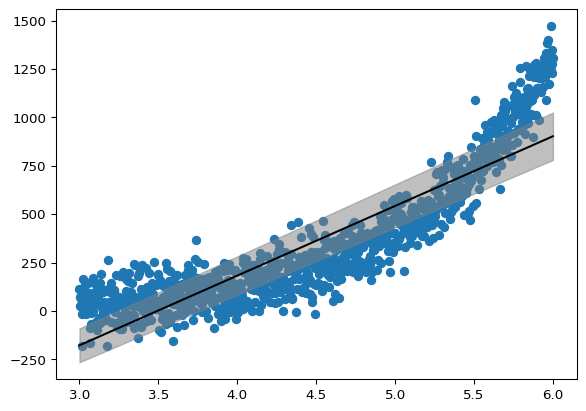

In [47]:
y_fit = utils.linear(x, *popt)
y_ci_low = utils.linear(x, *ci_low)
y_ci_high = utils.linear(x, *ci_high)

plt.scatter(x, y)
plt.plot(x, y_fit, color="black")
plt.fill_between(x, y1=y_ci_low, y2=y_ci_high, color="gray", alpha=0.5)

<span class="theorem-title">**Exercise 17**</span> Compute and plot the
99% confidence interval for the same linear model.

​

<span class="theorem-title">**Exercise 18**</span> Compute the 100%
confidence interval and print the values of `ci_low` and `ci_high`.

​

<span class="theorem-title">**Exercise 19**</span> Fit an exponential
model to the data and compute the 95% confidence interval. Then plot the
model’s prediction together with the original data and highlight the
confidence interval as a shaded area around the curve.

​

<span class="theorem-title">**Exercise 20**</span> Fit a polynomial
model to the data and compute the 95% confidence interval. Then plot the
model’s prediction together with the original data and highlight the
confidence interval as a shaded area around the curve. What does this
confidence interval tell you about the reliability of the model?

​

## 5 Providing Initial Guesses and Parameter Bounds

The optimizer behind scipy’s `curve_fit` is powerful and can solve many
optimization problems. However for certain more complex optimization
problems it may fail to find a solution or get stuck on a local minimum.
A local minimum is a combination of parameters that allows the model to
capture some of the data’s variance but that is not the correct
solution. In this case, it may be necessary to help the optimizer by
providing plausible bounds or making an initial guess for the model’s
parameters. In this section, we are going to explore some cases where
this is necessary.

| Code | Description |
|------------------------------------|------------------------------------|
| `y = utils.logistic(x, K, r, x0)` | Return the `y` values for the input `x` values using a `logistic` model with parameters `K`, `r` and `x0` |
| `y = utils.damped_sine(x, a, f, phi, gamma)` | Return the `y` values for the input `x` values using a `damped_sine` model with parameters `a`, `f`, `phi` and `gamma` |
| `popt, pcov = curve_fit(func, x, y, bounds=bound)` | Fit the function `func` to the data `x`, `y` with the given parameter `bounds` |
| `popt, pcov = curve_fit(func, x, y, p0=p0)` | Fit the function `func` to the data `x`, `y` with the initial parameter guess `p0` |

------------------------------------------------------------------------

Run the cell below to generate the data `x`, `y` and plot them.

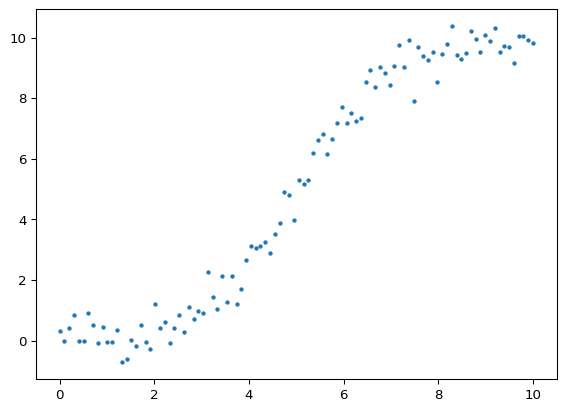

In [56]:
x, y = utils.generate_data3()
plt.scatter(x,y, s=5)

<span class="theorem-title">**Exercise 21**</span> Fit the
`utils.logistic` model to the data `x`, `y` and plot the model’s
prediction together with the original data. What does the warning
message tell you? Does the curve fit the data at all?

​

<span class="theorem-title">**Exercise 22**</span> The cell below
defines `bound` that set the lower bounds for the logistic function’s
capacity parameter `K` and growth parameter `r` to `0` and thus forces
them to be positive. Re-run `curve_fit` with the argument
`bounds=bounds`. Then, plot the model’s prediction together with the
original data.

In [59]:
bounds = ([0, 0, -np.inf], [np.inf, np.inf, np.inf])

​

<span class="theorem-title">**Exercise 23**</span> Modify the `bounds`
to force the growth parameter (the second parameter of the logistic
function) to be greater than `2` and rerun `curve_fit`. Then, plot the
model’s prediction together with the original data.

​

Run the cell below to generate the data `x`, `y` and plot them.

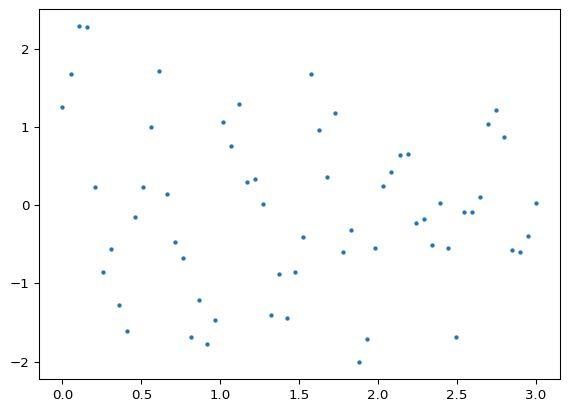

In [64]:
x, y = utils.generate_data4()
plt.scatter(x,y, s=5)

<span class="theorem-title">**Exercise 24**</span> Fit the
`utils.damped_sine` function to the data `x`, `y` and plot the model’s
prediction together with the original data.

​

<span class="theorem-title">**Exercise 25**</span> The cell below
defines an initial guess `p0` for the model’s parameters that sets the
frequency of the damped sine to `10` and all other parameters to `1` .
Re-run `curve_fit` with the argument `p0=p0`. Then, plot the models
prediction together with the original data.

In [67]:
p0 = [1, 10, 1, 1]

​

<span class="theorem-title">**Exercise 26**</span> Try different values
for the frequency parameter in `p0` to test how sensitive `curve_fit` is
to the initial guess.

​